In [98]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import plotly.graph_objs as go
import plotly.plotly as py
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [99]:
data = pd.read_stata('ps3q3.dta')
data = data.sort_values(by=['earn'])

In [100]:
data.head()

,award,age,earn,numchild,date
143,42.0,67.0,3.549528,0.0,18.0
8,40.0,37.0,3.649597,2.0,3.0
17,16.0,49.0,3.649597,0.0,4.0
3,60.0,32.0,3.696413,3.0,2.0
9,32.0,57.0,3.696413,0.0,3.0


In [132]:
data.head()

,award,age,earn,numchild,date,lnaward,lnearn,lnaward_z,lnage,lnnumchild
143,42.0,67.0,3.549528,0.0,18.0,3.737670,1.266815,-0.722505,4.204693,-inf
8,40.0,37.0,3.649597,2.0,3.0,3.688879,1.294617,-0.787346,3.610918,0.693147
17,16.0,49.0,3.649597,0.0,4.0,2.772589,1.294617,-2.005080,3.891820,-inf
3,60.0,32.0,3.696413,3.0,2.0,4.094345,1.307363,-0.248491,3.465736,1.098612
9,32.0,57.0,3.696413,0.0,3.0,3.465736,1.307363,-1.083900,4.043051,-inf


In [168]:
data['lnaward'] = np.log(data['award'])
data['lnearn'] = np.log(data['earn'])
data['lnage'] = np.log(data['age'])
data['lnnumchild'] = np.log(data['numchild'])

/Users/bassim/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning:

divide by zero encountered in log



In [171]:
data['lnaward_z'] = ((data['lnaward'] - data['lnaward'].mean())/(data['lnaward'].std()))

empirical first moment of distribution ln(award) is 0.0
empirical second moment of distribution ln(award) is 0.99
empirical third moment of distribution ln(award) is -0.47
empirical fourth moment of distribution ln(award) is 3.01


/Users/bassim/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



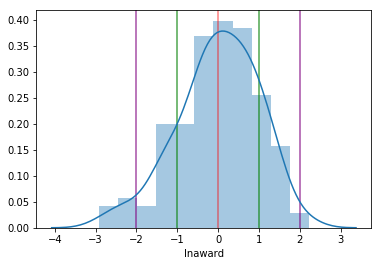

In [172]:
print ('empirical first moment of distribution ln(award) is', round(sum(data['lnaward_z'])/len(data['lnaward_z']),2))

print ('empirical second moment of distribution ln(award) is', round(sum((data['lnaward_z']-data['lnaward_z'].mean())**2)/len(data['lnaward_z']),2))

print ('empirical third moment of distribution ln(award) is', round(sum((data['lnaward_z']-data['lnaward_z'].mean())**3)/len(data['lnaward_z']),2))

print ('empirical fourth moment of distribution ln(award) is', round(sum((data['lnaward_z']-data['lnaward_z'].mean())**4)/len(data['lnaward_z']),2))

plt.axvline(x=6.602580348650615e-07,c='r',alpha=0.5)
plt.axvline(x=6.602580348650615e-07 - 9.999998e-01,c='green',alpha=0.7)
plt.axvline(x=6.602580348650615e-07 - 2*9.999998e-01,c='purple',alpha=0.7)
plt.axvline(x=6.602580348650615e-07 + 9.999998e-01,c='green',alpha=0.7)
plt.axvline(x=6.602580348650615e-07 + 2*9.999998e-01,c='purple',alpha=0.7)
sns.distplot(lnaward_z)

In [104]:
# OLS estimates ln(award) and ln(earnings) for (b)

Y = data['lnaward']
X = data['lnearn']
X = sm.add_constant(X)

model = sm.OLS(Y, X).fit()
model.params

const    -0.969194
lnearn    3.425834
dtype: float64

Text(0.5,0,'lnearn')

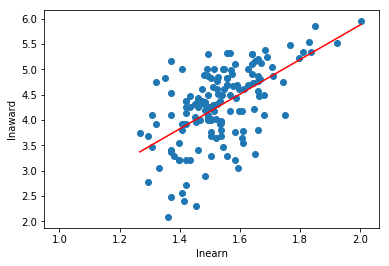

In [105]:
plt.scatter(x=data['lnearn'],y=data['lnaward'])
plt.plot(X, X*3.425834 - 0.969194, 'r')
plt.ylabel('lnaward')
plt.xlabel('lnearn')

In [106]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                lnaward   R-squared:                       0.339
Model:                            OLS   Adj. R-squared:                  0.335
Method:                 Least Squares   F-statistic:                     75.98
Date:                Sat, 06 Oct 2018   Prob (F-statistic):           5.36e-15
Time:                        13:28:17   Log-Likelihood:                -138.60
No. Observations:                 150   AIC:                             281.2
Df Residuals:                     148   BIC:                             287.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9692      0.604     -1.603      0.111      -2.164       0.225
lnearn         3.4258      0.393      8.717      0.000       2.649       4.202
==============================================================================
Omnibus:                        8.083   Durbin-Watson:                   2.076
Prob(Omnibus):                  0.018   Jarque-Bera (JB):                8.012
Skew:                          -0.559   Prob(JB):                       0.0182
Kurtosis:                       3.182   Cond. No.                         26.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

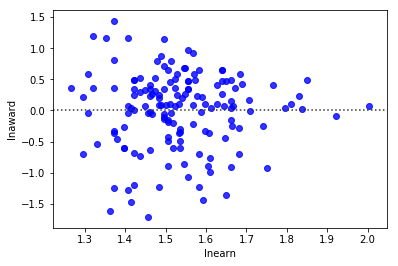

In [107]:
sns.residplot(data['lnearn'], data['lnaward'], lowess=False, color="b")

In [110]:
Y = data['lnaward']
X = data['date']
X = sm.add_constant(X)

model = sm.OLS(Y, X).fit()
model.params

const    3.855753
date     0.041750
dtype: float64

In [111]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                lnaward   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     11.32
Date:                Sat, 06 Oct 2018   Prob (F-statistic):           0.000976
Time:                        13:28:30   Log-Likelihood:                -164.15
No. Observations:                 150   AIC:                             332.3
Df Residuals:                     148   BIC:                             338.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.8558      0.140     27.593      0.000       3.580       4.132
date           0.0417      0.012      3.365      0.001       0.017       0.066
==============================================================================
Omnibus:                        6.873   Durbin-Watson:                   1.436
Prob(Omnibus):                  0.032   Jarque-Bera (JB):                6.893
Skew:                          -0.525   Prob(JB):                       0.0319
Kurtosis:                       3.022   Cond. No.                         26.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

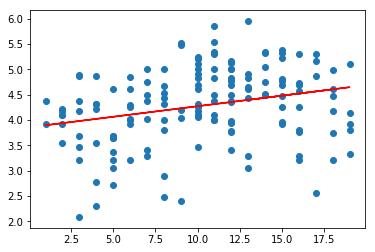

In [112]:
plt.scatter(data['date'],data['lnaward'])
plt.plot(X, X*0.041750 + 3.855753, 'r')

In [122]:
X = data[['lnearn','date']]
X = sm.add_constant(X)
y = data['lnaward']
model = sm.OLS(y, X).fit()
model.params

const    -0.933447
lnearn    3.241179
date      0.024257
dtype: float64

In [124]:
Y = data['date']
X = data['lnaward']
X = sm.add_constant(X)

model = sm.OLS(Y, X).fit()
model.params

const      2.906034
lnaward    1.702114
dtype: float64

In [126]:
X = data[['lnearn','date','lnage']]
X = sm.add_constant(X)
y = data['lnaward']
model = sm.OLS(y, X).fit()
model.params

const     1.650718
lnearn    3.216847
date      0.023993
lnage    -0.691252
dtype: float64

In [127]:
Y = data['lnage']
X = data['lnearn']
X = sm.add_constant(X)

model = sm.OLS(Y, X).fit()
model.params

const     3.738945
lnearn   -0.038105
dtype: float64

In [159]:
# adding numchild

X = data[['lnearn','date','lnage','numchild']]
X = sm.add_constant(X)
y = data['lnaward']
model = sm.OLS(y, X).fit()
model.params

const       0.961139
lnearn      3.190109
date        0.021288
lnage      -0.532886
numchild    0.093226
dtype: float64

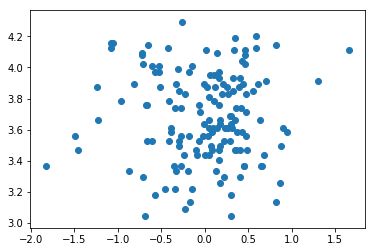

In [177]:
# predicted residual vs lnearn

plt.scatter(model.resid,data['ln'])

(array([ 2.,  3.,  6., 17., 29., 41., 39., 11.,  1.,  1.]),
 array([-1.82184703, -1.47399686, -1.12614668, -0.7782965 , -0.43044632,
        -0.08259614,  0.26525404,  0.61310422,  0.9609544 ,  1.30880458,
         1.65665476]),
 <a list of 10 Patch objects>)

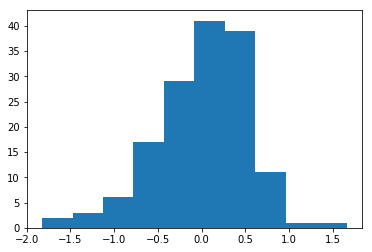

In [176]:
plt.hist(model.resid)

In [182]:
model_resid = ((model.resid - model.resid.mean())/(model.resid.std()))

In [186]:
print ('empirical first moment of distribution ln(award) is', round(sum(model_resid)/len(model_resid)))

print ('empirical second moment of distribution ln(award) is', round(sum((model_resid-model_resid.mean())**2)/len(model_resid),2))

print ('empirical third moment of distribution ln(award) is', round(sum((model_resid-model_resid.mean())**3)/len(model_resid),2))

print ('empirical fourth moment of distribution ln(award) is', round(sum((model_resid-model_resid)**4)/len(model_resid),2))

empirical first moment of distribution ln(award) is 0
empirical second moment of distribution ln(award) is 0.99
empirical third moment of distribution ln(award) is -0.48
empirical fourth moment of distribution ln(award) is 0.0


/Users/bassim/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



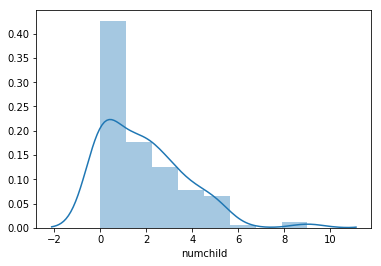

In [129]:
sns.distplot(data['numchild'])

In [134]:
data['numchild_z'] = (data['numchild'] - data['numchild'].mean())/data['numchild'].std()

/Users/bassim/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



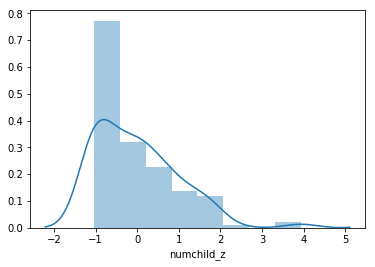

In [136]:
sns.distplot(data['numchild_z'])

In [135]:
print ('empirical first moment of distribution ln(award) is', round(sum(data['numchild_z'])/len(data['numchild_z']),2))

print ('empirical second moment of distribution ln(award) is', round(sum((data['numchild_z']-data['numchild_z'].mean())**2)/len(data['numchild_z']),2))

print ('empirical third moment of distribution ln(award) is', round(sum((data['numchild_z']-data['numchild_z'].mean())**3)/len(data['numchild_z']),2))

print ('empirical fourth moment of distribution ln(award) is', round(sum((data['numchild_z']-data['numchild_z'].mean())**4)/len(data['numchild_z']),2))

empirical first moment of distribution ln(award) is 0.0
empirical second moment of distribution ln(award) is 0.99
empirical third moment of distribution ln(award) is 1.09
empirical fourth moment of distribution ln(award) is 4.56


In [147]:
data['lnnumchild'] = data['lnnumchild'].clip(lower=0)

/Users/bassim/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



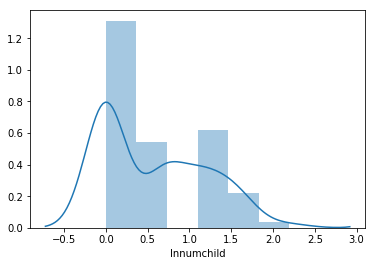

In [148]:
sns.distplot(data['lnnumchild'])